In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#IMPORTS
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
location = 'nw2'
turbine = 'c02'
mode = 'SS2'

In [4]:
# GET THE DATA
package_folder = os.path.dirname(os.path.dirname(os.getcwd()))
data_folder = os.path.join(package_folder, 'data')

In [5]:
from src.data.utils import get_input_data
data = get_input_data(data_folder, location, turbine)
data['turbine_data'].columns

Index(['location', 'mean_NW2_C02_rpm', 'mean_NW2_C02_yaw', 'std_NW2_C02_pitch',
       'mean_NW2_C02_pitch', 'mean_NW2_C02_power', 'std_NW2_C02_towerxacc',
       'std_NW2_C02_toweryacc', 'std_NW2_C02_windspeed',
       'mean_NW2_C02_towerxacc', 'mean_NW2_C02_toweryacc',
       'mean_NW2_C02_windspeed', 'mean_NW2_C02_winddirection',
       'mpe_NW2_C02_FA', 'mpe_NW2_C02_SS', 'mpe_NW2_C02_FA1',
       'mpe_NW2_C02_SS1', 'max_NW2_C02_NAC_ACC_Z', 'min_NW2_C02_NAC_ACC_Z',
       'rms_NW2_C02_NAC_ACC_Z', 'std_NW2_C02_NAC_ACC_Z',
       'max_NW2_C02_NAC_ACC_FA', 'max_NW2_C02_NAC_ACC_SS',
       'mean_NW2_C02_NAC_ACC_Z', 'min_NW2_C02_NAC_ACC_FA',
       'min_NW2_C02_NAC_ACC_SS', 'rms_NW2_C02_NAC_ACC_FA',
       'rms_NW2_C02_NAC_ACC_SS', 'std_NW2_C02_NAC_ACC_FA',
       'std_NW2_C02_NAC_ACC_SS', 'mean_NW2_C02_NAC_ACC_FA',
       'mean_NW2_C02_NAC_ACC_SS', 'rms1p_NW2_C02_NAC_ACC_Z',
       'rms1p_NW2_C02_NAC_ACC_FA', 'rms1p_NW2_C02_NAC_ACC_SS'],
      dtype='object')

In [6]:
from src.data.make_dataset import create_input_target_dataset
X, y = create_input_target_dataset(data_folder, location, turbine, mode)

rpm_split = 6.5

X_lowrpm = X.loc[X.filter(regex = 'rpm')[X.filter(regex = 'rpm') < rpm_split].dropna().index]
y_lowrpm = y.loc[X_lowrpm.index]

# Split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_lowrpm, y_lowrpm, test_size=0.1, shuffle=False)
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=True, random_state=123)

dropped mvbc columns:  {'mvbc_WandelaarMeasuringpile_Relative_humidity', 'mvbc_WandelaarBuoy_Sea_water_temperature'}


In [7]:
X

,mean_NW2_C02_rpm,mean_NW2_C02_pitch,mean_NW2_C02_power,mean_NW2_C02_windspeed,sin_mean_NW2_C02_yaw,cos_mean_NW2_C02_yaw,sin_mean_NW2_C02_winddirection,cos_mean_NW2_C02_winddirection,mvbc_WandelaarBuoy_10%_highest_waves,mvbc_WandelaarBuoy_Wave_height,mvbc_WandelaarBuoy_Average_wave_period,mvbc_WandelaarBuoy_Height_waves_with_period_>_10_s,mvbc_WandelaarBuoy_Sea_water_temperature,mvbc_WandelaarMeasuringpile_Max_3-seconds_wind_gust_(at_10_m_height),mvbc_WandelaarMeasuringpile_Average_wind_direction,mvbc_WandelaarMeasuringpile_Average_wind_speed_(at_10_m_height),mvbc_WandelaarMeasuringpile_Tide_TAW,mvbc_WandelaarMeasuringpile_Relative_humidity,mvbc_WandelaarMeasuringpile_Air_pressure,mvbc_WandelaarMeasuringpile_Air_temperature
timestamp,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00+00:00,0.000,90.700,-18.240,20.363,-0.247878,-0.968791,-0.252610,-0.967568,158.000000,124.000000,3.930000,11.000000,9.000000,14.500000,216.000000,12.000000,195.000000,76.000000,1004.400000,12.700000
2023-01-01 00:10:00+00:00,0.000,90.700,-17.920,19.484,-0.223216,-0.974769,-0.219880,-0.975527,157.666667,123.666667,3.966667,10.666667,8.966667,14.033333,213.666667,11.933333,186.000000,75.000000,1004.433333,12.766667
2023-01-01 00:20:00+00:00,0.000,90.700,-17.344,17.918,-0.179695,-0.983722,-0.178734,-0.983898,157.333333,123.333333,4.003333,10.333333,8.933333,13.566667,211.333333,11.866667,177.000000,74.000000,1004.466667,12.833333
2023-01-01 00:30:00+00:00,0.000,90.700,-16.000,18.012,-0.152727,-0.988268,-0.133882,-0.990997,157.000000,123.000000,4.040000,10.000000,8.900000,13.100000,209.000000,11.800000,168.000000,73.000000,1004.500000,12.900000
2023-01-01 00:40:00+00:00,0.000,90.700,-17.344,16.145,-0.145012,-0.989430,-0.137756,-0.990466,154.000000,120.666667,4.053333,9.666667,8.900000,13.200000,209.333333,11.800000,162.666667,73.666667,1004.533333,12.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 23:20:00+00:00,10.445,-2.882,6846.272,10.625,0.274748,0.961516,0.263452,0.964672,207.333333,162.333333,4.793333,7.333333,13.700000,11.666667,35.666667,9.733333,331.666667,92.000000,1022.333333,11.666667
2023-05-31 23:30:00+00:00,10.445,-3.133,7191.808,10.922,0.274748,0.961516,0.283647,0.958929,206.000000,161.000000,4.840000,7.000000,13.700000,11.400000,34.000000,9.400000,327.000000,92.000000,1022.300000,11.700000
2023-05-31 23:40:00+00:00,10.445,-2.602,6537.856,10.480,0.319489,0.947590,0.325040,0.945700,201.666667,158.000000,4.776667,7.000000,13.733333,12.000000,35.333333,9.933333,320.666667,91.666667,1022.266667,11.733333


In [162]:
from catboost import CatBoostRegressor, Pool, EShapCalcType, EFeaturesSelectionAlgorithm

#regr_model = CatBoostRegressor(iterations=100, random_seed=13, posterior_sampling=True, loss_function='RMSEWithUncertainty', verbose=False)
regr_model = CatBoostRegressor(iterations=1000, depth=3, random_seed=13, posterior_sampling=True, loss_function='RMSEWithUncertainty', verbose=False)

regr_model.fit(X_train, y_train)

In [163]:
low_rpm_preds_ = regr_model.virtual_ensembles_predict(X_lowrpm, prediction_type='TotalUncertainty', virtual_ensembles_count=20, ntree_end=100) #, virtual_ensembles_count=100, ntree_end=200)
low_rpm_preds_df = pd.DataFrame(low_rpm_preds_, columns=['prediction', 'knowledge uncertainty', 'data uncertainty'], index=X_lowrpm.index)

low_rpm_preds = low_rpm_preds_[:,0] # mean values predicted by a virtual ensemble
low_rpm_knowledge_uncertainty = low_rpm_preds_[:,1] # knowledge uncertainty predicted by a virtual ensemble
low_rpm_data_uncertainty = low_rpm_preds_[:,2] # average estimated data uncertainty


In [164]:
preds_ = regr_model.virtual_ensembles_predict(X, prediction_type='TotalUncertainty', virtual_ensembles_count=20, ntree_end=100) #, virtual_ensembles_count=100, ntree_end=200)
preds_df = pd.DataFrame(preds_, columns=['prediction', 'knowledge uncertainty', 'data uncertainty'], index=X.index)

preds = preds_[:,0] # mean values predicted by a virtual ensemble
knowledge_uncertainty = preds_[:,1] # knowledge uncertainty predicted by a virtual ensemble
data_uncertainty = preds_[:,2] # average estimated data uncertainty

In [165]:
data_uncertainty_lim = 0.0002
low_data_uncertainty_predictipons = preds_df[preds_df['data uncertainty'] < data_uncertainty_lim]

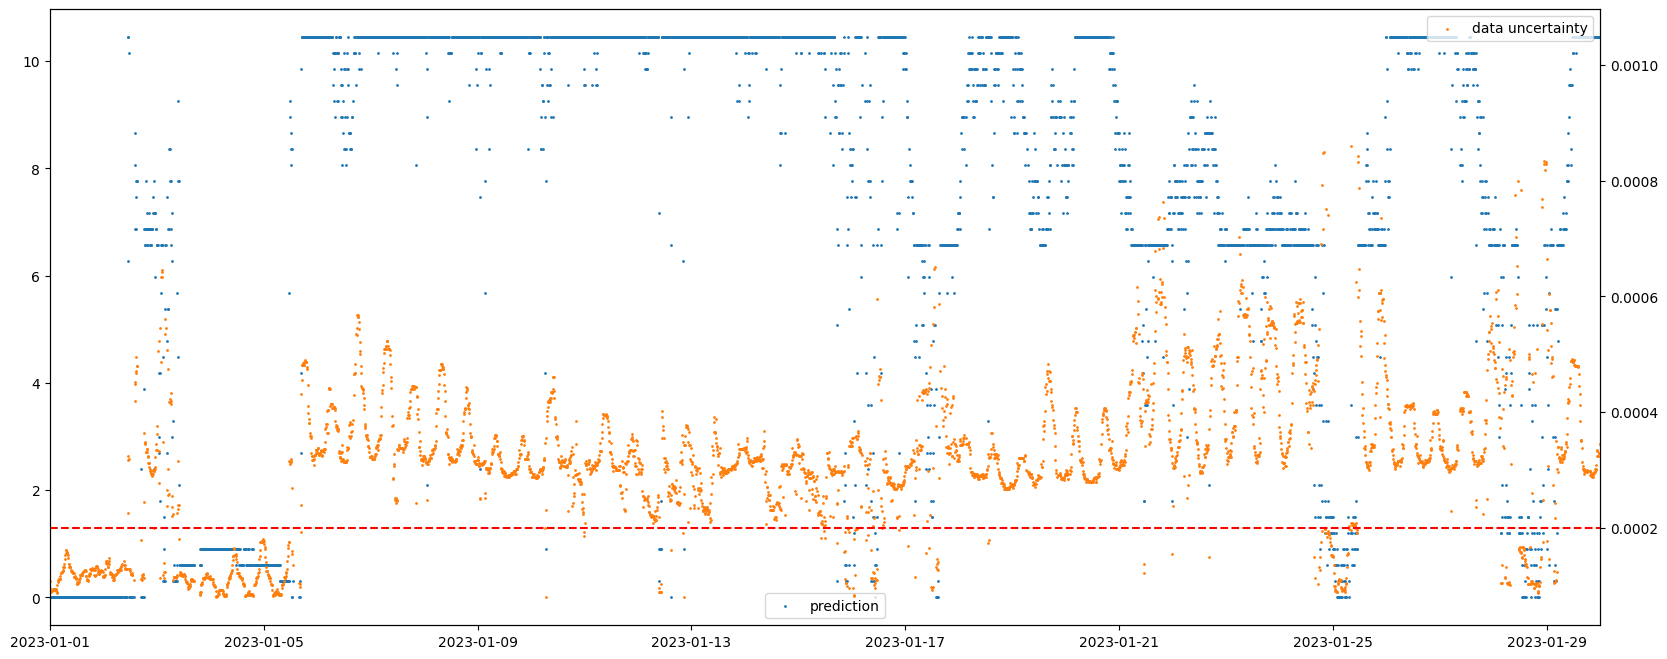

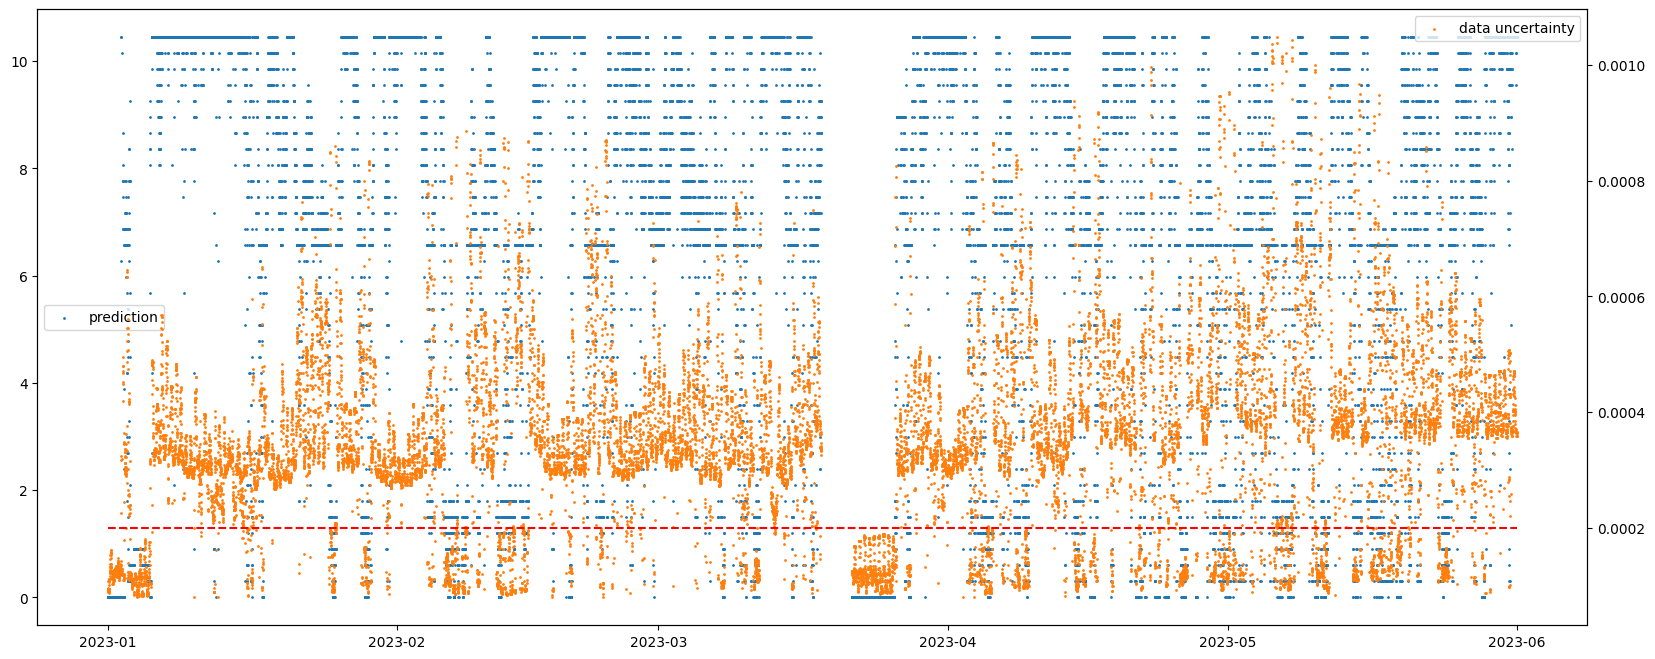

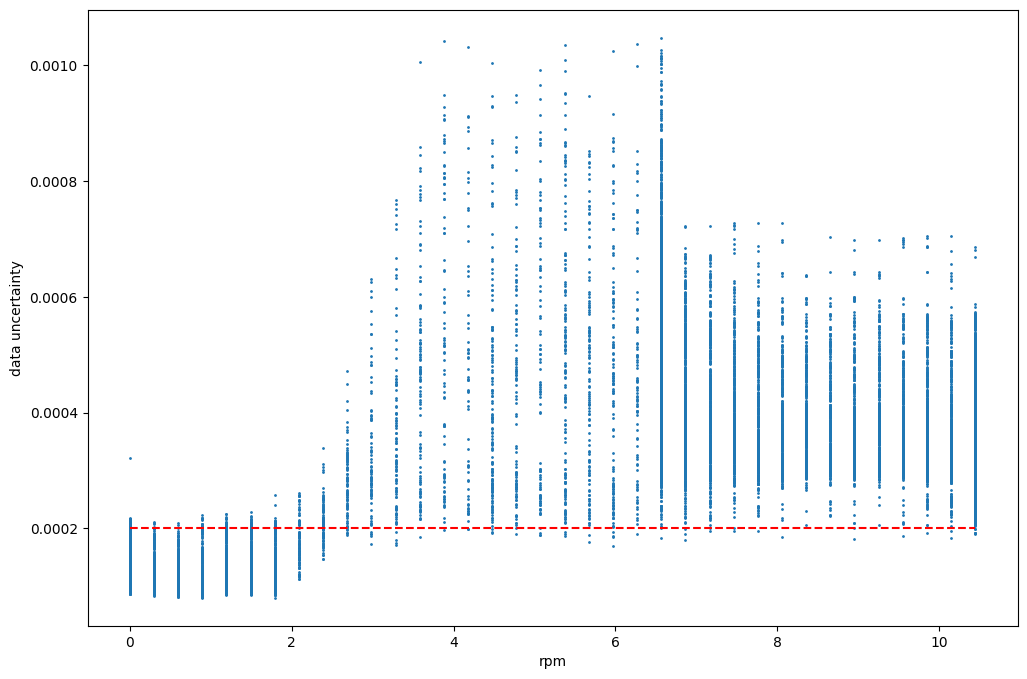

In [166]:
plt.figure(figsize=(20,8))

# Plot the first scatter plot
plt.scatter(X.index, X.filter(regex='rpm'), label='prediction', s=1)
plt.legend()
# Create the twin axis
ax2 = plt.twinx()

# Plot the second scatter plot on the twin axis
#ax2.scatter(preds_df.index, preds_df['knowledge uncertainty'], label='knowledge uncertainty')
ax2.scatter(preds_df.index, preds_df['data uncertainty'], label='data uncertainty', s=1, color='tab:orange')
plt.xlim(datetime.datetime(2023, 1, 1), datetime.datetime(2023, 1, 30))
plt.hlines(data_uncertainty_lim, datetime.datetime(2023, 1, 1), datetime.datetime(2023, 1, 30), color='red', linestyle='--')
# Show the legend
plt.legend(loc='upper right')

# Show the plot
plt.show()
plt.close()

plt.figure(figsize=(20,8))

# Plot the first scatter plot
plt.scatter(X.index, X.filter(regex='rpm'), label='prediction', s=1)
plt.legend()
# Create the twin axis
ax2 = plt.twinx()

# Plot the second scatter plot on the twin axis
#ax2.scatter(preds_df.index, preds_df['knowledge uncertainty'], label='knowledge uncertainty')
ax2.scatter(preds_df.index, preds_df['data uncertainty'], label='data uncertainty', s=1, color='tab:orange')
plt.hlines(data_uncertainty_lim, preds_df.index[0] ,preds_df.index[-1], color='red', linestyle='--')
# Show the legend
plt.legend(loc='upper right')

# Show the plot
plt.show()
plt.close()


plt.figure(figsize=(12,8))
plt.scatter(X.filter(regex='rpm'), preds_df['data uncertainty'], s=1)
plt.ylabel('data uncertainty')
plt.xlabel('rpm')
plt.hlines(data_uncertainty_lim, 0, X.filter(regex='rpm').max(), color='red', linestyle='--')
plt.show()
plt.close()

In [167]:
def transform_uncertainty(uncertainty: pd.Series, max_value: float):
    transformed_uncertainty = uncertainty.copy()
    transformed_uncertainty[transformed_uncertainty > max_value] = max_value
    transformed_uncertainty = transformed_uncertainty / max_value
    return transformed_uncertainty

def smart_track(tracked_modes: pd.Series, predictions: pd.Series, uncertainty: pd.Series, uncertainty_limit: float):
    smart_tracked = tracked_modes.loc[uncertainty<uncertainty_limit].copy()
    return smart_tracked

transformed_data_uncertainty = transform_uncertainty(data_uncertainty, data_uncertainty_lim)
smart_tracked_modes = smart_track(y, preds, data_uncertainty, data_uncertainty_lim)

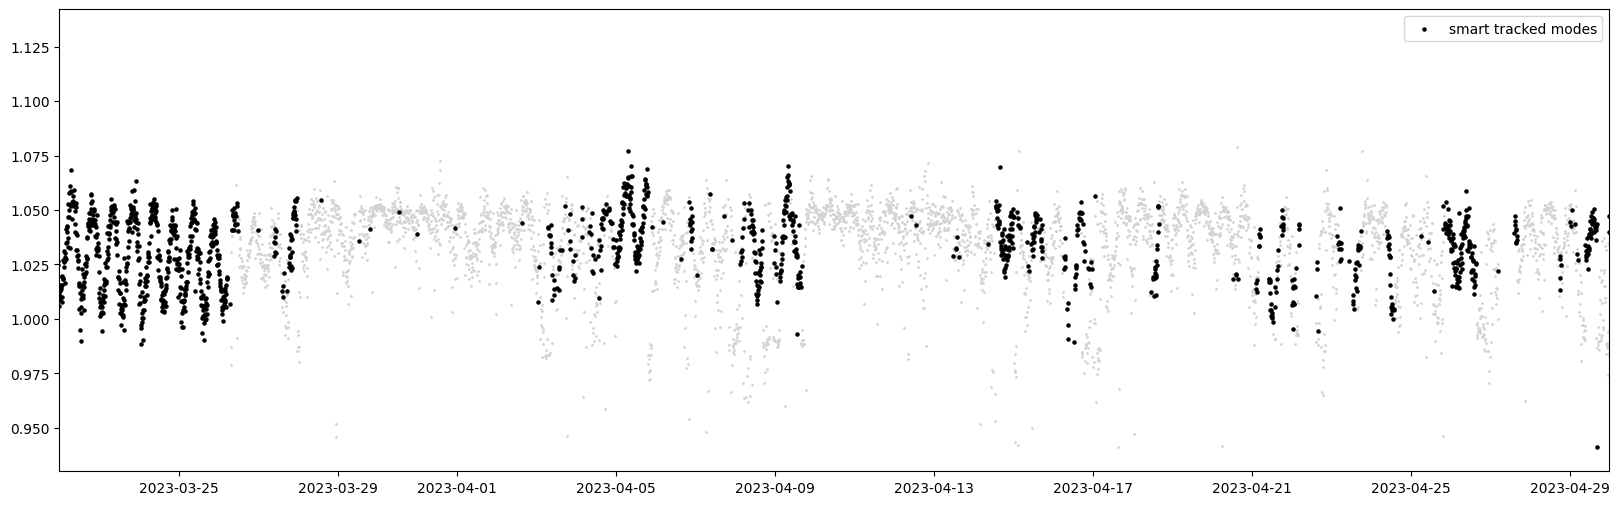

In [168]:
plt.figure(figsize=(20,6))
plt.scatter(y.index, y, s=1, color='lightgrey')

plt.scatter(smart_tracked_modes.index, smart_tracked_modes, s=5, color='k', label='smart tracked modes')
plt.xlim(datetime.datetime(2023, 3, 22), datetime.datetime(2023, 4, 30))
plt.legend()


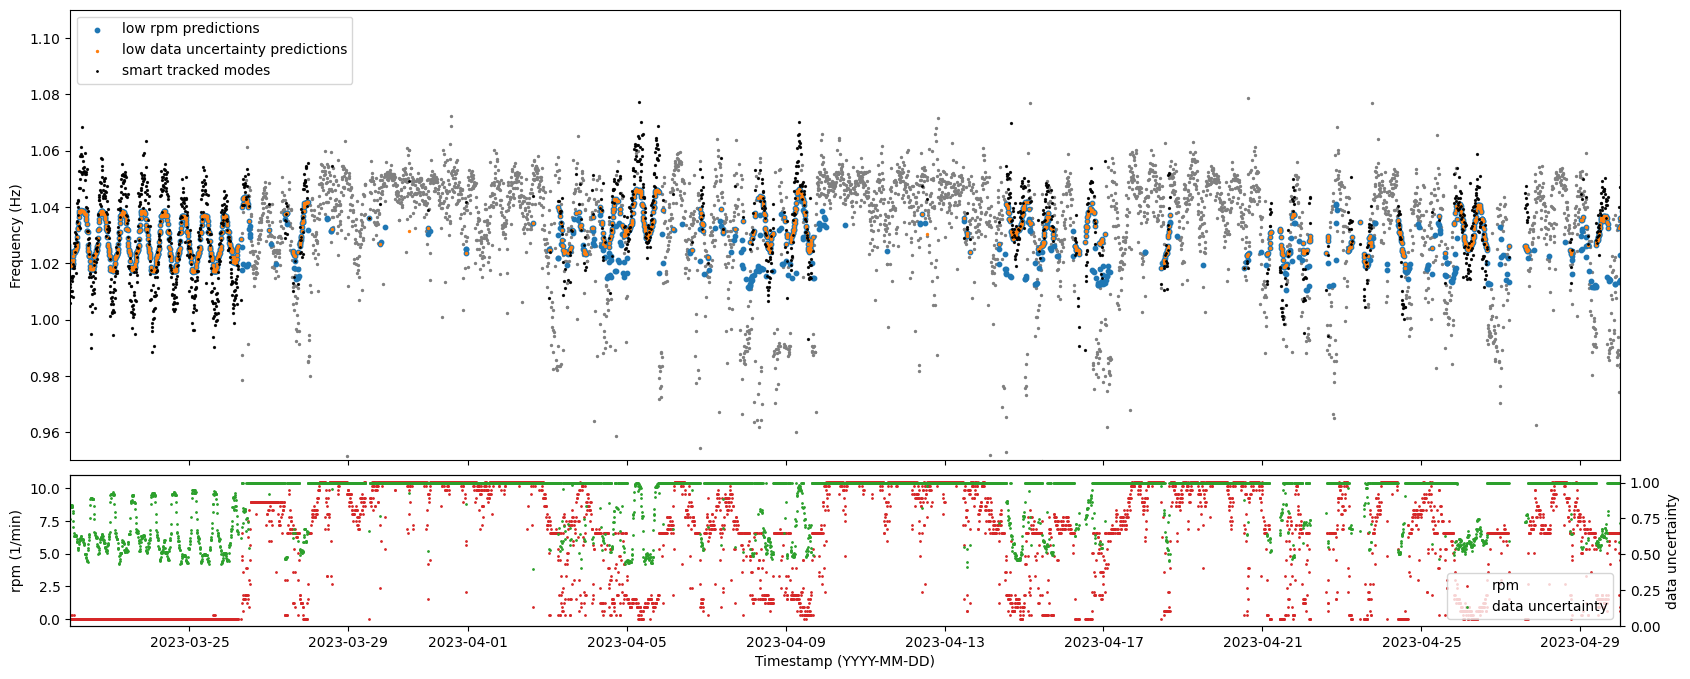

In [169]:
import matplotlib.pyplot as plt
import datetime

# Create two subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Plot on the first subplot
ax1.scatter(y.index, y, s=2, color='grey')
ax1.scatter(y_lowrpm.index, low_rpm_preds_df['prediction'], s=10, color='tab:blue', label='low rpm predictions')
ax1.scatter(low_data_uncertainty_predictipons.index, low_data_uncertainty_predictipons['prediction'], s=2, color='tab:orange', label='low data uncertainty predictions')
ax1.scatter(smart_tracked_modes.index, smart_tracked_modes, s=1, color='k', label='smart tracked modes')

ax1.set_ylim(0.95, 1.11)
ax1.legend(loc='upper left')
ax1.set_ylabel('Frequency (Hz)')

# Plot on the second subplot
ax2.scatter(X.index, X.filter(regex='rpm'), label='rpm', s=1, color='tab:red')
ax2.set_ylabel('rpm (1/min)')
ax2.set_xlabel('Timestamp (YYYY-MM-DD)')

ax3 = ax2.twinx()
ax3.scatter(X.index,transformed_data_uncertainty, label='data uncertainty', s=1, color='tab:green')
ax3.set_ylabel('data uncertainty')
ax3.set_ylim(0,1.05)

# Collect handles and labels for ax2 and ax3
handles2, labels2 = ax2.get_legend_handles_labels()
handles3, labels3 = ax3.get_legend_handles_labels()

# Combine handles and labels
combined_handles = handles2 + handles3
combined_labels = labels2 + labels3

# Create a single combined legend
plt.legend(combined_handles, combined_labels, loc='lower right')

# Set shared x-axis properties
plt.xlim(datetime.datetime(2023, 3, 22), datetime.datetime(2023, 4, 30))
plt.subplots_adjust(hspace=0.05)  # Adjust this value as needed


plt.show()
plt.close()


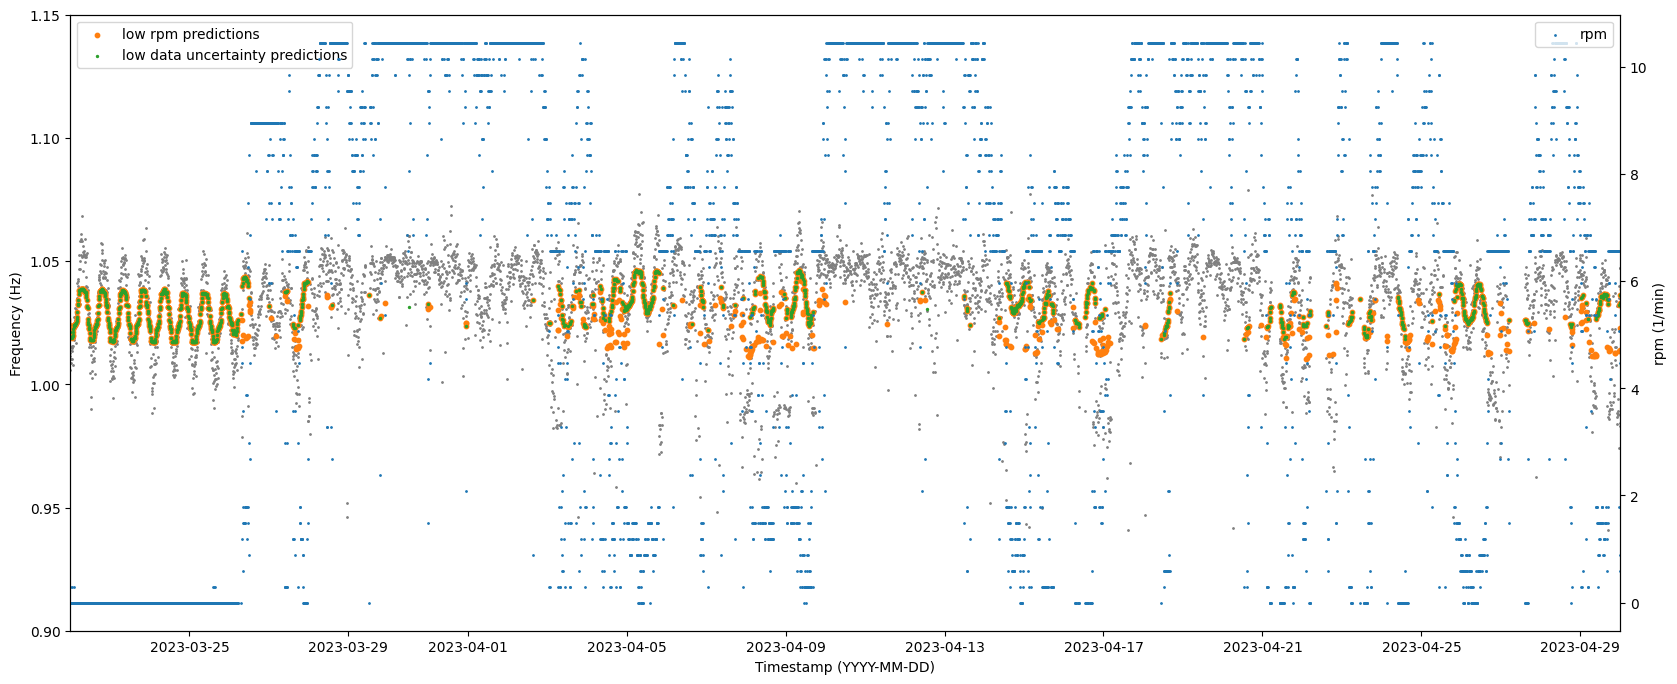

In [170]:
import matplotlib.pyplot as plt
import datetime
plt.subplots(figsize=(20,8))
plt.scatter(y.index, y, s=1, color='grey')
#plt.scatter(preds_df.index, preds_df['prediction'], s=1, label='all predcitions', color='tab:blue')

#plt.scatter(y_lowrpm.index, y_lowrpm, s=1)
plt.scatter(y_lowrpm.index, low_rpm_preds_df['prediction'], s=10, color='tab:orange', label='low rpm predictions')
plt.scatter(low_data_uncertainty_predictipons.index, low_data_uncertainty_predictipons['prediction'], s=2, color='tab:green', label='low data uncertainty predictions')
plt.ylim(0.9, 1.15)
plt.legend(loc='upper left')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Timestamp (YYYY-MM-DD)')
ax2 = plt.twinx()
ax2.scatter(X.index, X.filter(regex='rpm'), label='rpm', s=1, color='tab:blue')

ax2.set_ylabel('rpm (1/min)')
plt.xlim(datetime.datetime(2023, 3, 22), datetime.datetime(2023, 4, 30))
plt.legend(loc='upper right')

plt.show()
plt.close()

[17.70661755 11.34802472  8.26564623  5.68967764  0.67044765  1.96323931
  0.77491595  1.32624151  6.49603117  4.49538223  3.59312996  0.79498694
  4.05954529  2.32273718  1.63047493  2.4429806  21.92889435  1.8050541
  0.62684734  2.05912536]
['mean_NW2_C02_rpm', 'mean_NW2_C02_pitch', 'mean_NW2_C02_power', 'mean_NW2_C02_windspeed', 'sin_mean_NW2_C02_yaw', 'cos_mean_NW2_C02_yaw', 'sin_mean_NW2_C02_winddirection', 'cos_mean_NW2_C02_winddirection', 'mvbc_WandelaarBuoy_10%_highest_waves', 'mvbc_WandelaarBuoy_Wave_height', 'mvbc_WandelaarBuoy_Average_wave_period', 'mvbc_WandelaarBuoy_Height_waves_with_period_>_10_s', 'mvbc_WandelaarBuoy_Sea_water_temperature', 'mvbc_WandelaarMeasuringpile_Max_3-seconds_wind_gust_(at_10_m_height)', 'mvbc_WandelaarMeasuringpile_Average_wind_direction', 'mvbc_WandelaarMeasuringpile_Average_wind_speed_(at_10_m_height)', 'mvbc_WandelaarMeasuringpile_Tide_TAW', 'mvbc_WandelaarMeasuringpile_Relative_humidity', 'mvbc_WandelaarMeasuringpile_Air_pressure', 'mvbc_Wan

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'mean_NW2_C02_rpm'),
  Text(1, 0, 'mean_NW2_C02_pitch'),
  Text(2, 0, 'mean_NW2_C02_power'),
  Text(3, 0, 'mean_NW2_C02_windspeed'),
  Text(4, 0, 'sin_mean_NW2_C02_yaw'),
  Text(5, 0, 'cos_mean_NW2_C02_yaw'),
  Text(6, 0, 'sin_mean_NW2_C02_winddirection'),
  Text(7, 0, 'cos_mean_NW2_C02_winddirection'),
  Text(8, 0, 'mvbc_WandelaarBuoy_10%_highest_waves'),
  Text(9, 0, 'mvbc_WandelaarBuoy_Wave_height'),
  Text(10, 0, 'mvbc_WandelaarBuoy_Average_wave_period'),
  Text(11, 0, 'mvbc_WandelaarBuoy_Height_waves_with_period_>_10_s'),
  Text(12, 0, 'mvbc_WandelaarBuoy_Sea_water_temperature'),
  Text(13, 0, 'mvbc_WandelaarMeasuringpile_Max_3-seconds_wind_gust_(at_10_m_height)'),
  Text(14, 0, 'mvbc_WandelaarMeasuringpile_Average_wind_direction'),
  Text(15, 0, 'mvbc_WandelaarMeasuringpile_Average_wind_speed_(at_10_m_height)'),
  Text(16, 0, 'mvbc_WandelaarMeasuringpile_Tide_TAW'),
  Text(17, 0, 'mvbc_Wandelaar

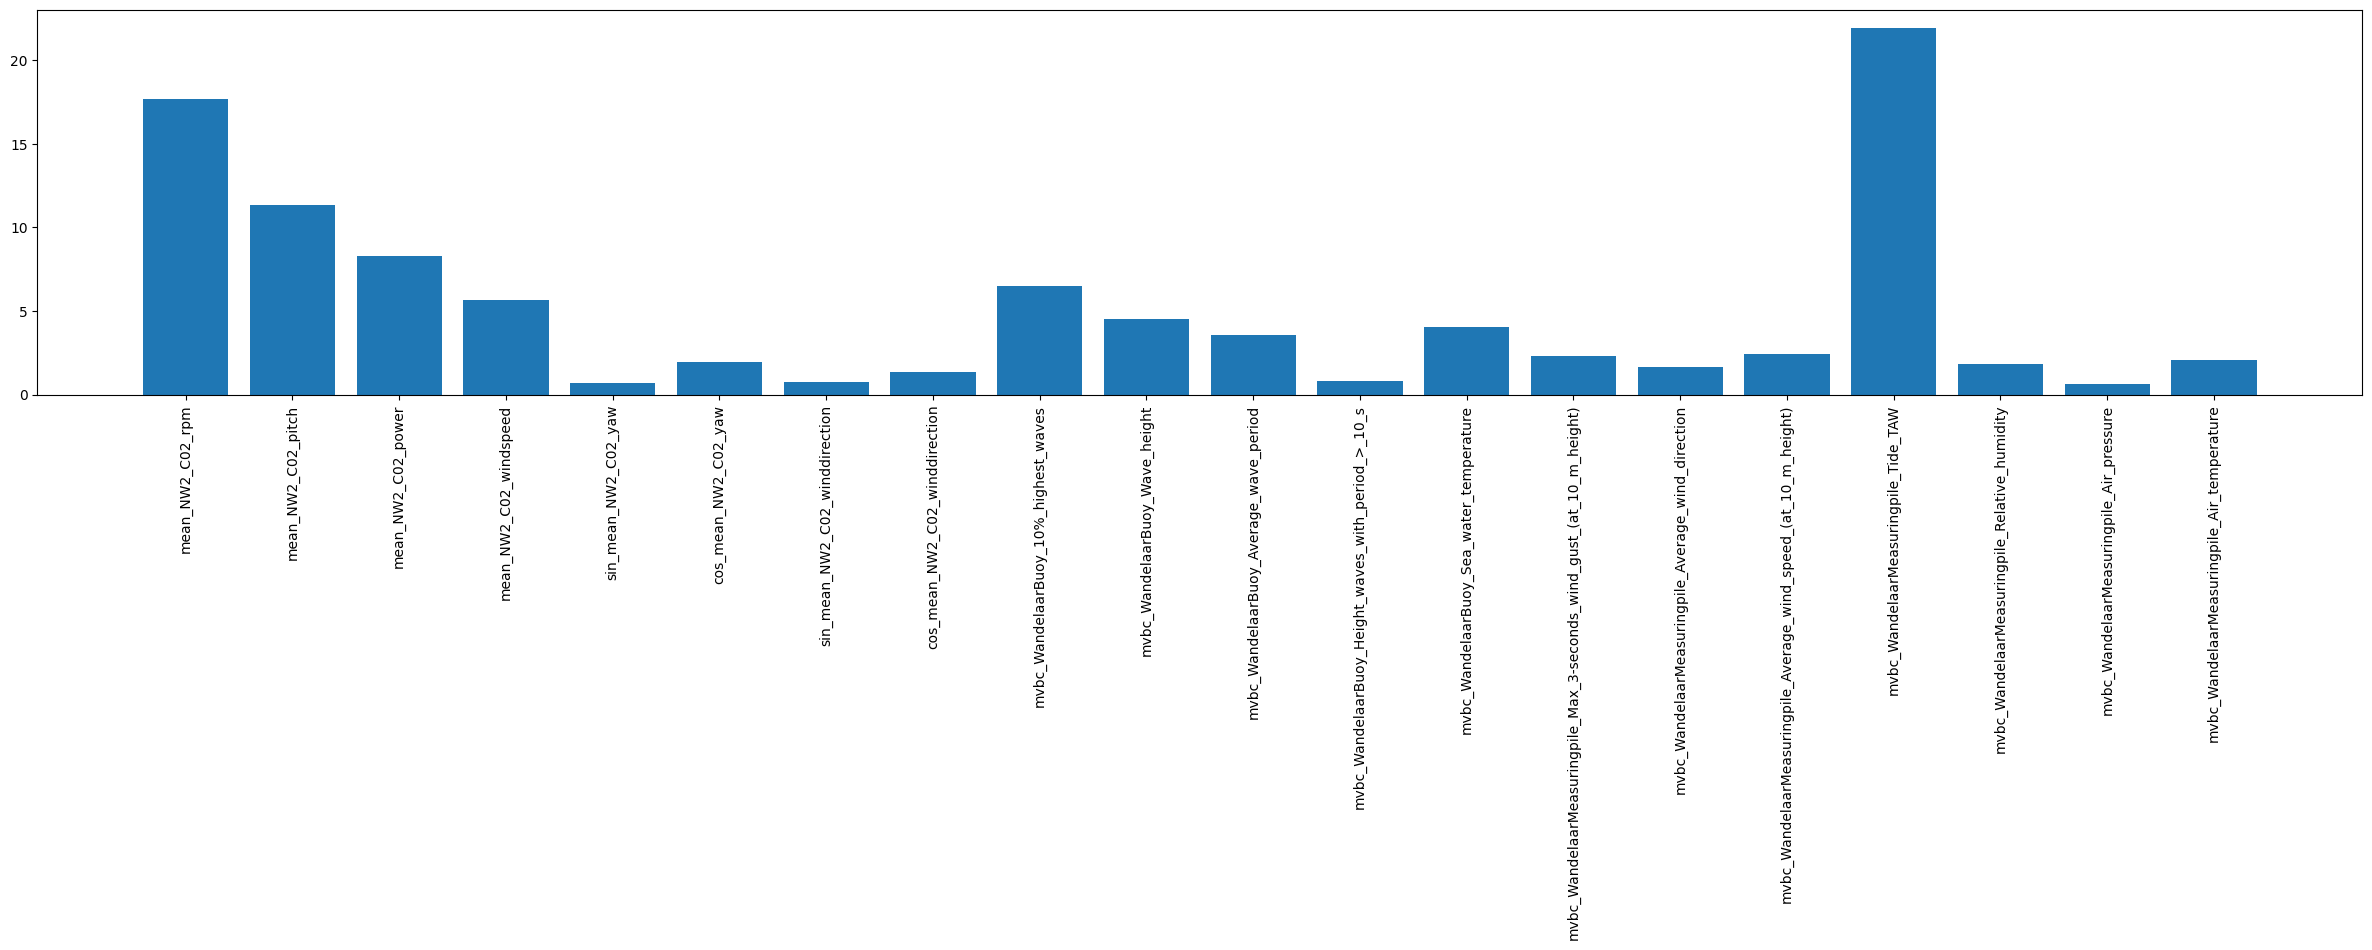

In [171]:
print(regr_model.feature_importances_)
print(regr_model.feature_names_)
plt.figure(figsize=(30,5))
plt.bar(regr_model.feature_names_, regr_model.feature_importances_)
plt.xticks(rotation=90)


In [172]:
def transform_uncertainty(uncertainty: pd.Series, max_value: float):
    

SyntaxError: incomplete input (4265253078.py, line 2)

In [ ]:
ax2.scatter(preds_df.index, preds_df['data uncertainty'], label='data uncertainty', s=1, color='tab:orange')
